这篇笔记总结了关于立方型状态方程（Cubic EOS）的一些知识，代码用到了 `Thermo` 和 `CoolProp` 这两个热力学库。

# 方程的提出与发展
立方型状态方程最早由荷兰物理学家范德华提出。虽然原初方程本身的应用价值有限，但它奠定了这一大家族的理论框架，并孵化出了 RK、SRK、PR 等多种实用的状态方程。近些年也出现了不少精度更高的非立方型状态方程，但它们的计算量也往往更大。总体来看，立方型状态方程在结果精度与计算效率之间实现了较好的平衡。

1873 年，范德华在理想气体状态方程的基础上，提出了第一个立方型状态方程：
\begin{equation*}
P=\frac{RT}{V_m-b}-\frac{a}{V_m^2}
\end{equation*}
其中，参数 $b$ 被称为“协体积”或“斥力项”，用于表征分子自身占据的体积；$\dfrac{a}{V_m^2}$ 被称为“引力项”，用于描述分子间的引力作用。

对范德华方程进行通分、消分母并合并同类项，可得到一个关于摩尔体积 $V_m$ 的三次多项式：
\begin{equation*}
P=\frac{RT}{V_m-b}-\frac{a}{V_m^2}
\Rightarrow P(V_m-b)V_m^2=RTV_m^2-a(V_m-b)
\Rightarrow PV_m^3-(Pb+RT)V_m^2+aV_m-ab=0
\end{equation*}
这正是“立方型状态方程”这一术语的来源。

尽管范德华本人也早就意识到引力项还受温度的影响，直到几十年的之后的 1948 年才由 Redlich 和 Kwong 将其纳入到改进后的方程中<sup>[1]</sup>。
\begin{equation*}
P=\frac{RT}{V_m-b}-\frac{a/\color{blue}{T^{0.5}}}{V_m(V_m+b)}
\end{equation*}

Soave 进一步将温度的影响提炼为一个关于温度与偏心因子的多项式函数 $\alpha(T,\omega)$，用以替代 $1/T^{0.5}$，于 1972 年提出了 SRK 方程<sup>[2]</sup>：
\begin{equation*}
P=\frac{RT}{V_m-b}-\frac{a\color{blue}{\alpha(T,\omega)}}{V_m(V_m+b)}
\end{equation*}

彭定宇和他的导师 Robinson 教授继续改进了 SRK 方程，于 1976 年提出 PR 方程， 使其在液相密度与相平衡方面表现的更好<sup>[3]</sup>。
\begin{equation*}
P=\frac{RT}{V_m-b}-\frac{a\alpha(T,\omega)}{V_m(V_m+b)+\color{blue}{b(V_m-b)}}
\end{equation*}
至此，大功既成，立方型状态方程近 50 年来再无形式上的重大改进。


# 方程参数的求解
本节先了解参数 $a$、$b$ 的求解方法，再学习 Maxwell 等面积原则，该原则用于在 S 曲线上确定纯物质的饱和蒸汽压。

## 参数求解
纯物质的临界点是其临界等温线的拐点，因此该点的压力对摩尔体积的一阶、二阶偏导数都为零。
\begin{gather*}
\left(\frac{\partial P}{\partial V_m}\right)_{T_c} = 0\\[2ex]
\left(\frac{\partial^2 P}{\partial V_m^2}\right)_{T_c} = 0
\end{gather*}
有了这两个约束，就可以求得方程的 $a$、$b$ 参数。下面以范德华方程为例，展示求解过程。

范德华方程对 $V_{m}$ 的一阶、二阶偏导数如下：
\begin{align*}
\left(\frac{\partial P}{\partial V_m}\right)_T&=-\frac{RT}{(V_m-b)^2}+\frac{2a}{V_m^3} \\[2ex]
\left(\frac{\partial^2 P}{\partial V_m^2}\right)_T&=\frac{2RT}{(V_{m}-b)^3}-\frac{6a}{V_{m}^4}
\end{align*}

代入临界参数：
\begin{align*}
-\frac{RT_c}{(V_{m,c}-b)^2}+\frac{2a}{V_{m,c}^3}=0 \Rightarrow \frac{RT_c}{(V_{m,c}-b)^2} = \frac{2a}{V_{m,c}^3}\\[2ex]
\frac{2RT_c}{(V_{m,c}-b)^3}-\frac{6a}{V_{m,c}^4}=0 \Rightarrow \frac{2RT_c}{(V_{m,c}-b)^3} = \frac{6a}{V_{m,c}^4}
\end{align*}

上式相除得到 $b$ 关于 $V_{m,c}$ 的表达式：
\begin{equation*}
\frac{V_{m,c}-b}{2}=\frac{V_{m,c}}{3} \Rightarrow b=\frac{V_{m,c}}{3}
\end{equation*}
再将 $b$ 代回到原方程，得到 $a$ 的表达式：
\begin{equation*}
\frac{RT_c}{\left (\frac{2V_{m,c}}{3} \right)^2} = \frac{2a}{V_{m,c}^3} \Rightarrow a = \frac{9RT_cV_{m,c}}{8}
\end{equation*}

接着将 $a$ 和 $b$ 一起代入到范德华方程：
\begin{equation*}
P_c=\frac{RT_c}{2/3V_{m,c}}-\frac{9RT_cV_{m,c}}{8V_{m,c}^2} \Rightarrow P_c = \frac{3}{8}\frac{RT_c}{V_{m,c}} \Rightarrow V_{m,c}=\frac{3}{8}\frac{RT_c}{P_c}
\end{equation*}

借助上式，最终消去了 $a$ 和 $b$ 中的 $V_{m,c}$ 项。
\begin{align*}
a&=\frac{27}{64}\frac{R^2T_c^2}{P_c}\\[2ex]
b&=\frac{1}{8}\frac{RT_c}{P_c}
\end{align*}

## 临界压缩因子
此外，有了上面的 $V_{m,c}$ 关于 $P_c$ 和 $T_c$ 的表达式，还能求得临界压缩因子。
\begin{equation*}
Z_c=\frac{P_cV_{m,c}}{RT_c}=\frac{P_c}{RT_c}\cdot\frac{3RT_c}{8P_c}=\frac{3}{8}=0.375
\end{equation*}
用不同立方型方程求得的临界压缩因子如下：
| Equation of State (EOS) | Critical Compressibility Factor (Zc) |
|---------------------|:------------------:|
| vdW (van der Waals) | 0.375 |
| RK (Redlich–Kwong) | 0.333 |
| SRK (Soave–Redlich–Kwong) | 0.333 |
| PR (Peng–Robinson) | 0.307 |

实验结果表明，大多数非极性气体的临界压缩因子通常落在 0.27–0.30。由此可见，方程的改进在促使不断接近这个范围。

## 饱和蒸汽压
左图是氨的实际等温线，右图是用 PR 方程绘制的 S 曲线。那么如何在 S 曲线上确定如左图的水平饱和线呢？Maxwell 给出了答案：右图虚线与曲线围成了上下两个封闭的区域；若这两个区域的面积相等，则当前虚线的纵坐标就是该温度下的饱和蒸汽压。这个原则被称为 “Maxwell Equal Area Construction”。好，下面用等温压缩的过程来理解下。

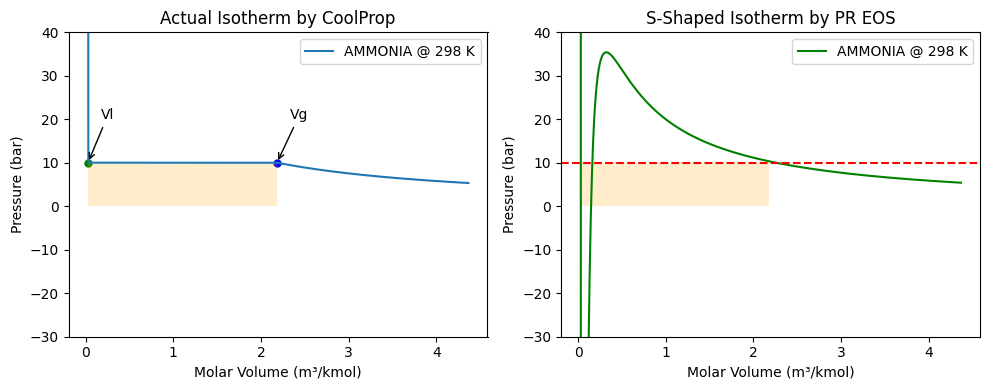

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
from CoolProp.CoolProp import PropsSI
from thermo.eos import PR, R
from thermo.chemical import Chemical

fluid = "AMMONIA"
T = 298.15  # K (25C)

chem = Chemical(fluid)
Pc, Tc, omega, MW = chem.Pc, chem.Tc, chem.omega, chem.MW

P_sat = PropsSI("P", "T", T, "Q", 1, fluid) / 1e5  # bar
Vm_g = MW / PropsSI("D", "T", T, "Q", 1, fluid)  # m3/kmol
Vm_l = MW / PropsSI("D", "T", T, "Q", 0, fluid)  # m3/kmol
pr = PR(Tc=Tc, Pc=Pc, omega=omega, T=T, V=1e-3)
b = pr.b
Vm = np.linspace(1.01 * b * 1000, 2 * Vm_g, 1000)  # m3/kmol

P = PropsSI("P", "T", T, "D", MW / Vm, fluid)  # Pa
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_ylim(-30, 40)
axs[0].plot(Vm, P / 1e5, label=f"{fluid} @ {T:.0f} K")
axs[0].scatter([Vm_l], [P_sat], c="g", s=25)
axs[0].annotate(
    "Vl",
    xy=(Vm_l, P_sat),
    xytext=(Vm_l + 0.15, P_sat + 10),
    arrowprops=dict(arrowstyle="->"),
)
axs[0].scatter([Vm_g], [P_sat], c="b", s=25)
axs[0].annotate(
    "Vg",
    xy=(Vm_g, P_sat),
    xytext=(Vm_g + 0.15, P_sat + 10),
    arrowprops=dict(arrowstyle="->"),
)

verts = [(Vm_g, P_sat), (Vm_l, P_sat), (Vm_l, 0), (Vm_g, 0)]
poly = Polygon(verts, fill=True, facecolor="orange", alpha=0.2)
axs[0].add_patch(poly)

axs[0].set_xlabel("Molar Volume (m³/kmol)")
axs[0].set_ylabel("Pressure (bar)")
axs[0].legend()
axs[0].set_title("Actual Isotherm by CoolProp")

Vm /=1000 # m3/kmol → m3/mol
P_pr = R * T / (Vm - b) - pr.a_alpha / (Vm * (Vm + b) + b * (Vm - b))  # Pa
axs[1].plot(Vm * 1000, P_pr / 1e5, color="g", label=f"{fluid} @ {T:.0f} K")
axs[1].axhline(y=P_sat, linestyle="--", color="r")

# shaded rectangle between Vl and Vg at Psat (all in m3/kmol, bar)
verts = [(Vm_g, P_sat), (Vm_l, P_sat), (Vm_l, 0), (Vm_g, 0)]
poly = Polygon(verts, fill=True, facecolor="orange", alpha=0.2)
axs[1].add_patch(poly)

axs[1].set_xlabel("Molar Volume (m³/kmol)")
axs[1].set_ylabel("Pressure (bar)")
axs[1].set_title("S-Shaped Isotherm by PR EOS")
axs[1].set_ylim(-30, 40)  # don't clip negative region
axs[1].legend()

plt.tight_layout()
plt.show()

想象一个不锈钢针筒里抽满了氨气，然后把针头堵死，接着缓慢推动柱塞。随着柱塞的推进，气压也在逐步升高。因为是推进是缓慢的，所以气体有足够的时间向周围散发压缩热，也意味着这个过程是等温的。

当压力升至 9.9 bar 时 （环境温度为 25 ℃ ），针筒里出现了几滴氨水，此时继续推柱塞，压力不再增长，却出现了更多的氨水，直至全部液化。左图的黄色区域代表液化过程中活塞对氨气所作的功，右图的 S 曲线也可以等效描述此过程，只要对气体作的功一样。**这就要求 S 曲线上下两个区域的面积相等，正负面积相互抵消。**

为什么要在 S 曲线上定位饱和线呢？这是因为为了验证方程的准确性，需将方程的计算结果与实验数据作对比。那对比什么实验数据好呢？饱和蒸汽压往往是最稳定的对比基准。

# 方程根的求解
## Z的三次多项式
立方型状态方程通常被表示为关于 Z 的三次多项式，这样做的好处是：
1. 无量纲，方程对于任何单位制都是统一的；
2. 方便逸度系数的表示；
3. 解范围固定（0~1），便于确定迭代初值。

下面将 PR 方程变换为 Z 的三次多项式。 首先将原始方程变换为关于 $V_m$ 的多项式：
\begin{equation*}
P=\frac{RT}{V_m-b}-\frac{a\alpha(T,\omega)}{V_m(V_m+b)+b(V_m-b)} \Rightarrow P V_m^3+(Pb-RT)V_m^2+\left(a\alpha(T,\omega)-2RTb-3Pb^2\right)V_m+\left(Pb^3+RTb^2-a\alpha(T,\omega)b\right)=0
\end{equation*}
方程两边各乘以 $\frac{P^2}{R^3T^3}$，这样就能把上式的三次项构造成 $Z^3$。
\begin{gather*}
\frac{P^3 V_m^3}{R^3T^3}
+\frac{P^2(Pb-RT)}{R^3T^3}V_m^2
+\frac{P^2\left(a\alpha(T,\omega)-2RTb-3Pb^2\right)}{R^3T^3}V_m
+\frac{P^2\left(Pb^3+RTb^2-a\alpha(T,\omega)b\right)}{R^3T^3}
=0\\[2ex]
\Downarrow\\[2ex]
\left(\frac{PV_m}{RT} \right)^3
+\frac{Pb-RT}{RT}\left(\frac{PV_m}{RT}\right)^2
+\frac{P\left(a\alpha(T,\omega)-2RTb-3Pb^2\right)}{R^2T^2}\frac{PV_m}{RT}
+\frac{P^2\left(Pb^3+RTb^2-a\alpha(T,\omega)b\right)}{R^3T^3}
=0\\[2ex]
\Downarrow\\[2ex]
Z^3
+\frac{Pb-RT}{RT}Z^2
+\frac{P\left(a\alpha(T,\omega)-2RTb-3Pb^2\right)}{R^2T^2}Z
+\frac{P^2\left(Pb^3+RTb^2-a\alpha(T,\omega)b\right)}{R^3T^3}=0
\end{gather*}

令:
\begin{align*}
A&=\frac{a\alpha(T,\omega)P}{R^2T^2}\\[2ex]
B&=\frac{bP}{RT}
\end{align*}
Z 最终表达如下：
\begin{align*}
Z^3+(B-1)Z^2+(A-3B^2-2B)Z+(B^3+B^2-AB)=0
\end{align*}
## 三次多项式的求解
Cardano 和 牛顿迭代是求解三次多项式的常用方法，前者是解析法，后者是试差法。它们各有各的优势，也各有各的缺点。

### Cardano解析法
Cardano 方法的优点是直接，大多数情形下也够稳够快。然而有时会数值不稳定，而稳定是对算法最基本的要求。




In [8]:
import math
import sys
import numpy as np
from thermo.eos import PR, R
from thermo.chemical import Chemical


def generate_ceos_coeffs(fluid, P, T):
    """
    Compute Peng-Robinson EOS cubic coefficients in Z
    x^3 + alpha * x^2 + beta * x + gamma = 0
    Return alpha, beta, gamma
    """
    chem = Chemical(fluid)
    Pc, Tc, omega = chem.Pc, chem.Tc, chem.omega
    pr_eos = PR(Pc=Pc, Tc=Tc, omega=omega, T=T, P=P)
    A = pr_eos.a_alpha * P / (R * R * T * T)
    B = pr_eos.b * P / (R * T)
    alpha = B - 1
    beta = A - 3 * B * B - 2 * B
    gamma = B * B * B + B * B - A * B

    return alpha, beta, gamma


def ceos_zfunc_cardano(coeffs):
    """
    Solve cubic EOS: x^3 + alpha * x^2 + beta * x + gamma = 0
    Return real roots in ascending order
    """
    if coeffs is None or len(coeffs) != 3:
        raise ValueError("Must be 3 coefficients")

    # near-zero flag
    eps = sys.float_info.epsilon * 1e4

    alpha, beta, gamma = map(float, coeffs)

    Q = (3.0 * beta - alpha * alpha) / 9.0
    R = (9.0 * alpha * beta - 27.0 * gamma - 2.0 * alpha**3) / 54.0
    D = Q**3 + R**2

    if D > eps:  # one real root
        S = math.cbrt(R + math.sqrt(D))
        T = math.cbrt(R - math.sqrt(D))
        return S + T - alpha / 3.0

    # Δ ≤ 0: three real roots (including triple root)
    if abs(R) <= eps and abs(Q) <= eps:
        return -alpha / 3.0

    denom = -(Q**3)
    if denom <= eps:
        return -alpha / 3.0

    c = R / math.sqrt(denom)
    c = max(-1.0, min(1.0, c))  # clamp to avoid acos NaN
    theta = math.acos(c)

    p1 = math.sqrt(-Q)
    p2 = math.cos(theta / 3.0)
    p3 = math.sqrt(3.0) * math.sin(theta / 3.0)

    root1 = -p1 * (p2 + p3) - alpha / 3.0
    # root2 = p1 * (-p2 + p3) - alpha / 3.0
    root3 = 2.0 * p1 * p2 - alpha / 3.0

    return root1, root3


def calc_pr_z():
    P = 101325  # 1 atm
    T = np.linspace(-195 + 273.15, 195 + 273.15, 10)
    for i, val in enumerate(T):
        alpha, beta, gamma = generate_ceos_coeffs("nitrogen", P, val)
        print(f"Z{ceos_zfunc_cardano([alpha, beta, gamma])}")


calc_pr_z()

Z(0.004812519596843812, 0.960081138764558)
Z0.987368685750435
Z0.9947357404033412
Z0.9975549435349171
Z0.9988473992689111
Z0.9995080029880514
Z(-0.0005138101379987825, 0.9998698615294812)
Z(-0.0009087807613457066, 1.0000768622393104)
Z(-0.0010209190363782428, 1.0001980596765927)
Z(-0.0010545433743843757, 1.0002692994768319)


#### 大数吃小数
计算机中浮点数运算存在一种叫“大数吃小数”的现象，比如说`1e16 + 1 - 1e16`，口算都知道是 1，但代码跑出来的结果却是 0。因为 b 比 a 小太多了，在 a 面前 b 几乎就不存在，所以两个浮点数 a、b 相加还是 a，最终结果是 0。

In [9]:
a = 1e16
b = 1
print(a + b - a)

0.0


跑一下下面的代码，果然和还是 a。那么这种现象的本质是什么呢？

In [10]:
a = 1e16
b = 1
print(a + b)

1e+16


大多数编程语言都采用`IEEE-754`标准表示浮点数，这里要指出的是浮点数并不等同于小数，整数同样可以用浮点数的形式表示。常见的双精度的浮点数的结构如下图。
![double IEEE754 presentation](https://courses.physics.illinois.edu/cs357/sp2020/assets/img/figs/ieee_double.png)

1e16 是十进制科学计数法表示，但 IEEE-754 浮点数并不使用十进制指数，而是使用二进制表示。在进行加法运算前，两个操作数都必须转换为形如 $1.x × 2^e$ 的二进制形式，并且对要对齐**二进制的指数**。
1e16 转换为双精度浮点数后，近似表示为：$1e16 ≈ 1.1102230246251565 × 2^{53}$。而 1 的浮点表示是：$1 = 1.0 × 2^0$。

在执行加法前，需要将指数较小的数与指数较大的数对齐，因此 1 的尾数需要右移 53 位：$1.0 × 2^0 → 0.000…0001 × 2^{53}$。此时，数字 1 已经被推到了尾数部分的第 54 位之后了。然而 IEEE-754 双精度浮点数的尾数（不含隐含位）只有 52 位 (如上图)，对齐过程中超出部分会被直接舍弃。因此，对齐后的 1 就成了$0.000…0000 × 2^5$，也意味着 1e16 实质上加的是 0 而不是 1。这就是所谓的“大数吃小数”。这不是错误，而是浮点数在有限尾数精度下，对齐和舍入导致的少量信息丢失。

如果两个双精度浮点数的数量级差到 $10^{16}$，它们相加减就会出现“大数吃小数”的现象。

# 方程根的分布
使用PR方程绘制出CO2的三条等温P-Vm曲线，它们的温度分别低于、等于、高于临界温度。水平虚线的纵坐标为此温度下的饱和蒸汽压。低于临界温度的那条曲线通常被称为S型曲线。单单观察这条曲线，可以发现在一定的压力范围内，同样的压力会对应三个不同的摩尔比体积。

立方型状态方程都是从理想气体状态发展而来，根据该方程P和Vm存在的关系是反关系，对应的曲线一定是递减的，因此上下极值点之间的那段递增曲线是没有意义的。这就意味着，如果存在三个不同的实数根，中间的那个根没有物理意义。

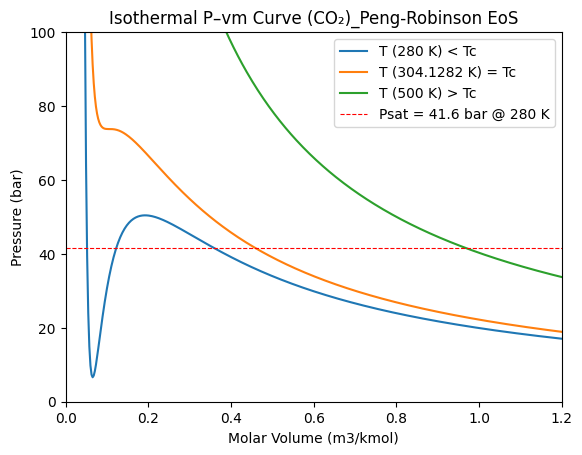

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from thermo.eos import PR, R

# CO2
Tc, Pc, omega = 304.1282, 7.3773e6, 0.22394

# Sub Critical
T = 280.0
b = 0.07780 * R * Tc / Pc
Vm = np.linspace(1.05 * b, 1000 * b, 10000)  # m3/mol
P = np.empty_like(Vm)
for i, val in enumerate(Vm):
    pr = PR(Tc=Tc, Pc=Pc, omega=omega, T=T, V=val)
    P[i] = pr.P
plt.plot(Vm * 1e3, P / 1e5)

# Critical
T = 304.1282
b = 0.07780 * R * Tc / Pc
Vm = np.linspace(1.05 * b, 1000 * b, 10000)
P = np.empty_like(Vm)
for i, val in enumerate(Vm):
    pr = PR(Tc=Tc, Pc=Pc, omega=omega, T=T, V=val)
    P[i] = pr.P
plt.plot(Vm * 1e3, P / 1e5)

# Super Critical
T = 500
b = 0.07780 * R * Tc / Pc
Vm = np.linspace(1.05 * b, 1000 * b, 10000)
P = np.empty_like(Vm)
for i, val in enumerate(Vm):
    pr = PR(Tc=Tc, Pc=Pc, omega=omega, T=T, V=val)
    P[i] = pr.P
plt.plot(Vm * 1e3, P / 1e5)


# Saturation line
plt.axhline(41.6, ls="--", c="r", lw=0.8)

plt.xlabel("Molar Volume (m3/kmol)")
plt.ylabel("Pressure (bar)")
plt.title("Isothermal P–vm Curve (CO₂)_Peng-Robinson EoS")
plt.legend(
    [
        "T (280 K) < Tc",
        "T (304.1282 K) = Tc",
        "T (500 K) > Tc",
        "Psat = 41.6 bar @ 280 K",
    ]
)
plt.ylim(0, 100)  # 0 ~ 150 bar_a
plt.xlim(0, 1.2)  # 0 ~ 1.2 m3/kmol
plt.show()

<center>参考文献</center>
[1] Otto. Redlich and J. N. S. Kwong, “On the Thermodynamics of Solutions. V. An Equation of State. Fugacities of Gaseous Solutions.,” Chem. Rev., vol. 44, no. 1, pp. 233–244, Feb. 1949, doi: 10.1021/cr60137a013.

[2] G. Soave, “Equilibrium constants from a modified Redlich-Kwong equation of state,” Chemical Engineering Science, vol. 27, no. 6, pp. 1197–1203, June 1972, doi: 10.1016/0009-2509(72)80096-4.

[3] D.-Y. Peng and D. B. Robinson, “A New Two-Constant Equation of State,” Ind. Eng. Chem. Fundam., vol. 15, no. 1, pp. 59–64, Feb. 1976, doi: 10.1021/i160057a011.


